In [62]:
import pandas, numpy
from novelty_experiment_runner_cartpole import NoveltyExperimentRunnerCartpole
from os import path
import settings
import constants
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
results_file = open(path.join(settings.ROOT_PATH, "data", "cartpole", "test", "repairing_test_wsu_copy.csv"), "r")

In [101]:
dataframe = pandas.read_csv(results_file)

In [102]:
dataframe['is_novel'] = numpy.where(dataframe['novelty_probability'] < dataframe['novelty_threshold'], False, True)

In [103]:
dataframe['TN'] = numpy.where( (dataframe['type'] == constants.NON_NOVELTY_PERFORMANCE) & (dataframe['is_novel'] == False), 1, 0)
dataframe['FP'] = numpy.where((dataframe['type'] == constants.NON_NOVELTY_PERFORMANCE) & (dataframe['is_novel'] == True), 1, 0)
dataframe['TP'] = numpy.where((((dataframe['type'] == constants.UNKNOWN_NOVELTY) | (dataframe['type'] == constants.KNOWN_NOVELTY)) & (dataframe['is_novel'] == True)),
                                      1, 0)
dataframe['FN'] = numpy.where((((dataframe['type'] == constants.UNKNOWN_NOVELTY) | (dataframe['type'] == constants.KNOWN_NOVELTY)) & (dataframe['is_novel'] == False)),
                                      1, 0)


In [104]:
print(dataframe)

    Unnamed: 0  trial_num  episode_num                     type  \
0            0          0            0  non-novelty-performance   
1            0          0            1  non-novelty-performance   
2            0          0            2  non-novelty-performance   
3            0          0            3          unknown-novelty   
4            0          0            4          unknown-novelty   
5            0          0            5          unknown-novelty   
6            0          0            3            known-novelty   
7            0          0            4            known-novelty   
8            0          0            5            known-novelty   
9            0          1            0  non-novelty-performance   
10           0          1            1  non-novelty-performance   
11           0          1            2  non-novelty-performance   
12           0          1            3          unknown-novelty   
13           0          1            4          unknown-novelt

1. Create trial groups

In [107]:
trials = dataframe[['trial_num', 'FN', 'FP', 'TN', 'TP', 'performance']].groupby(['trial_num']).agg({'FN': numpy.sum, 'FP': numpy.sum, 'TN': numpy.sum, 'TP': numpy.sum, 'performance': numpy.mean})

In [108]:
trials['is_CDT'] = numpy.where((trials['TP'] > 1) & (trials['FP'] ==0), True, False)

In [109]:
print(trials)

           FN  FP  TN  TP  performance  is_CDT
trial_num                                     
0           6   0   3   0        200.0   False
1           6   0   3   0        200.0   False


In [110]:
CDT_trials = trials[trials['is_CDT'] == True]

In [111]:
print(CDT_trials)

Empty DataFrame
Columns: [FN, FP, TN, TP, performance, is_CDT]
Index: []


In [112]:
M1 = CDT_trials['FN'].mean()
print("M1 is {}".format(M1))

M1 is nan


In [113]:
M2 = len(CDT_trials)/len(pandas.unique(dataframe['trial_num']))
print("M2 is {}".format(M2))

M2 is 0.0


In [114]:
def plot_experiment_results(df, novelty_episode_number):
    plt.figure(figsize=(16,9))
    sns.lineplot(data=df, y='performance', x='episode_num', hue='type', ci=95)
    plt.axvline(x=novelty_episode_number, color='red')
    plt.title("Experiment results", fontsize=20)
    plt.xlabel("episodes", fontsize=15)
    plt.ylabel("performance", fontsize=15)

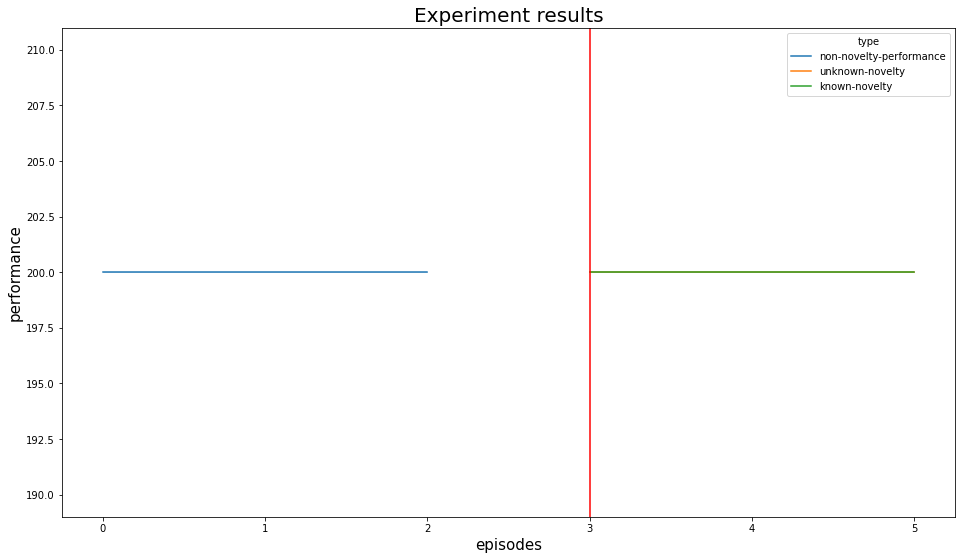

In [115]:
plot_experiment_results(dataframe, 3)

In [118]:
results_file_2 = open(path.join(settings.ROOT_PATH, "data", "cartpole", "test", "planner_experiment_test.csv"), "r")
dataframe = pandas.read_csv(results_file_2)
dataframe['is_novel'] = numpy.where(dataframe['novelty_probability'] < dataframe['novelty_threshold'], False, True)
dataframe['TN'] = numpy.where( (dataframe['type'] == constants.NON_NOVELTY_PERFORMANCE) & (dataframe['is_novel'] == False), 1, 0)
dataframe['FP'] = numpy.where((dataframe['type'] == constants.NON_NOVELTY_PERFORMANCE) & (dataframe['is_novel'] == True), 1, 0)
dataframe['TP'] = numpy.where((((dataframe['type'] == constants.UNKNOWN_NOVELTY) | (dataframe['type'] == constants.KNOWN_NOVELTY)) & (dataframe['is_novel'] == True)),
                                      1, 0)
dataframe['FN'] = numpy.where((((dataframe['type'] == constants.UNKNOWN_NOVELTY) | (dataframe['type'] == constants.KNOWN_NOVELTY)) & (dataframe['is_novel'] == False)),
                                      1, 0)
print(dataframe)

    Unnamed: 0  trial_num  episode_num                     type  \
0            0          0            0  non-novelty-performance   
1            0          0            1          unknown-novelty   
2            0          0            1            known-novelty   
3            0          0            0  non-novelty-performance   
4            0          0            1          unknown-novelty   
5            0          0            1            known-novelty   
6            0          0            0  non-novelty-performance   
7            0          0            1          unknown-novelty   
8            0          0            1            known-novelty   
9            0          0            0  non-novelty-performance   
10           0          0            1          unknown-novelty   
11           0          0            1            known-novelty   
12           0          0            0  non-novelty-performance   
13           0          0            1          unknown-novelt

In [119]:
trials = dataframe[['trial_num', 'env_config', 'FN', 'FP', 'TN', 'TP', 'performance']].groupby(['trial_num', 'env_config']).agg({'FN': numpy.sum, 'FP': numpy.sum, 'TN': numpy.sum, 'TP': numpy.sum, 'performance': numpy.mean})
trials['is_CDT'] = numpy.where((trials['TP'] > 1) & (trials['FP'] ==0), True, False)
print(trials)

                                                              FN  FP  TN  TP  \
trial_num env_config                                                           
0         {'gravity': 10.780000000000001, 'masscart': 1, ...   2   0   0   0   
          {'gravity': 11.76, 'masscart': 1, 'masspole': 0...   2   0   0   0   
          {'gravity': 7.840000000000001, 'masscart': 1, '...   2   0   0   0   
          {'gravity': 8.82, 'masscart': 1, 'masspole': 0....   2   0   0   0   
          {'gravity': 9.8, 'masscart': 0.8, 'masspole': 0...   2   0   0   0   
          {'gravity': 9.8, 'masscart': 0.9, 'masspole': 0...   2   0   0   0   
          {'gravity': 9.8, 'masscart': 1, 'masspole': 0.1...   2   0  10   0   
          {'gravity': 9.8, 'masscart': 1.0, 'masspole': 0...   2   0   0   0   
          {'gravity': 9.8, 'masscart': 1.1, 'masspole': 0...   2   0   0   0   
          {'gravity': 9.8, 'masscart': 1.2, 'masspole': 0...   2   0   0   0   

                                       

In [121]:
CDT_trials = trials[trials['is_CDT'] == True]
M1 = CDT_trials['FN'].mean()
print("M1 is {}".format(M1))
M2 = len(CDT_trials)/len(pandas.unique(dataframe['trial_num']))
print("M2 is {}".format(M2))

M1 is nan
M2 is 0.0


In [130]:
def plot_experiment_results(df, novelty_episode_number):
    plt.figure(figsize=(16,9))
    g = sns.FacetGrid(df, row='env_config', hue='type')
    g.map(sns.scatterplot, 'episode_num', 'performance')
    #sns.lineplot(data=df, y='performance', x='episode_num', hue='type', ci=95)
    #plt.axvline(x=novelty_episode_number, color='red')
    plt.title("Experiment results", fontsize=20)
    plt.xlabel("episodes", fontsize=15)
    plt.ylabel("performance", fontsize=15)

<Figure size 1152x648 with 0 Axes>

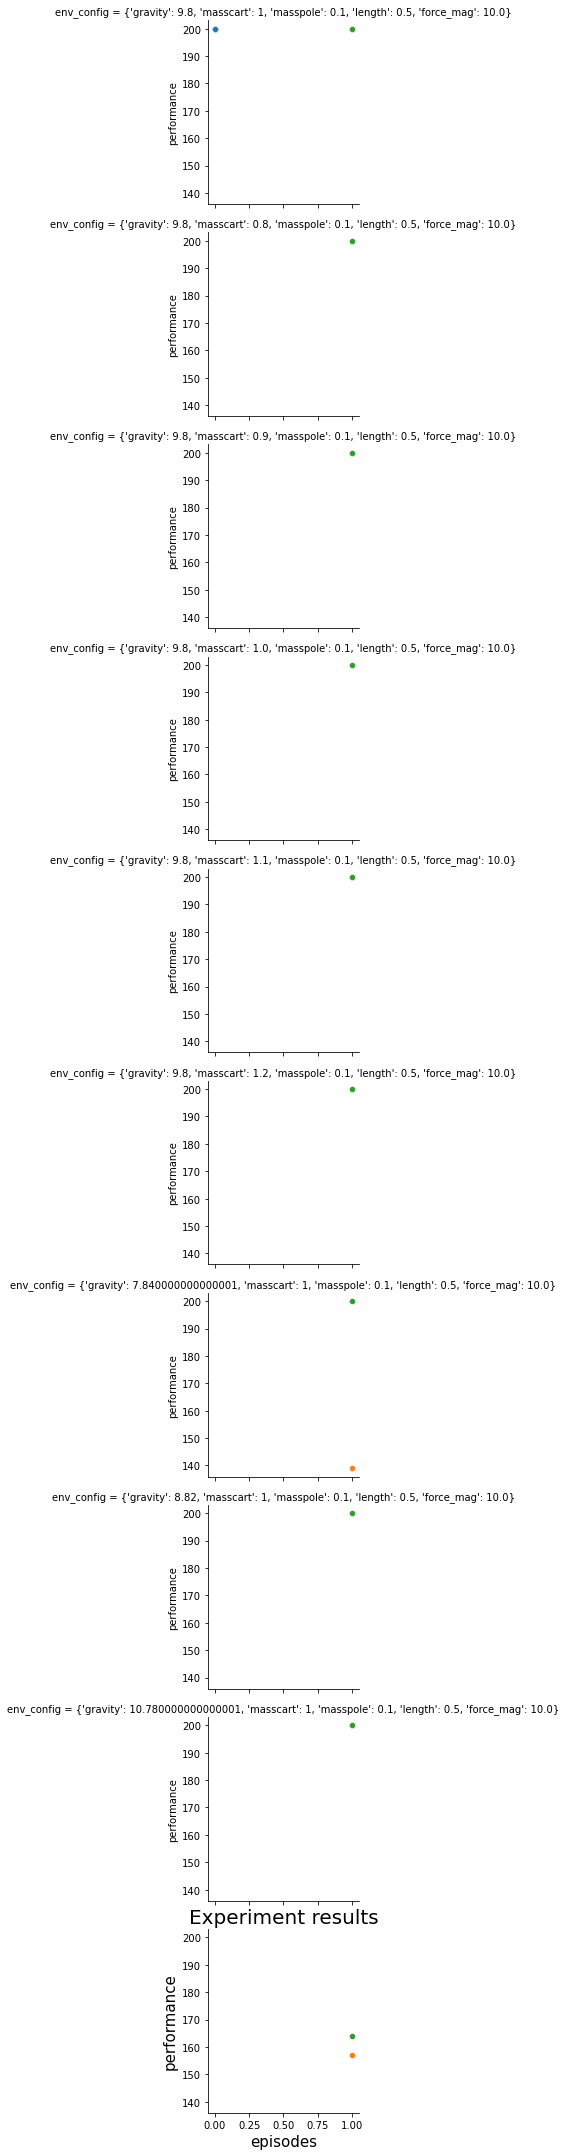

In [131]:
plot_experiment_results(dataframe, 3)